In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model


In [3]:
hp= pd.read_csv("homeprices.csv")

In [4]:
hp

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [5]:
hp.describe()

,area,bedrooms,age,price
count,6.000000,5.00000,6.000000,6.000000
mean,3416.666667,4.20000,16.500000,648333.333333
std,587.934237,1.30384,8.288546,109117.673484
min,2600.000000,3.00000,8.000000,550000.000000
25%,3050.000000,3.00000,9.750000,572500.000000
50%,3400.000000,4.00000,16.500000,602500.000000
75%,3900.000000,5.00000,19.500000,722500.000000
max,4100.000000,6.00000,30.000000,810000.000000


In [6]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   area      6 non-null      int64  
 1   bedrooms  5 non-null      float64
 2   age       6 non-null      int64  
 3   price     6 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 324.0 bytes


In [7]:
hp.sample(5)

,area,bedrooms,age,price
4,4000,5.0,8,760000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
5,4100,6.0,8,810000


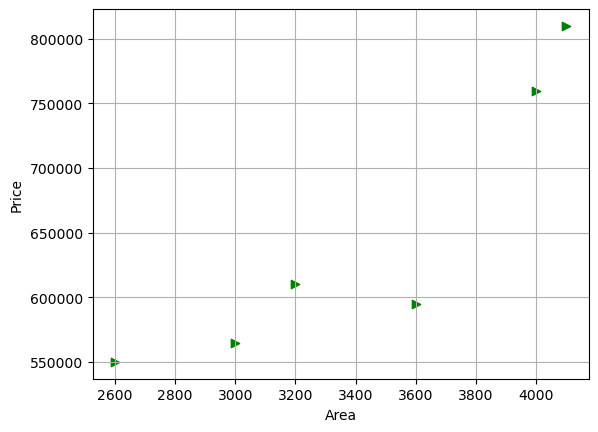

In [8]:
plt.xlabel('Area')
plt.ylabel('Price')
plt.scatter(hp.area,hp.price,color='green',marker='>')
plt.grid()
plt.show()



In [9]:
hp.area

0    2600
1    3000
2    3200
3    3600
4    4000
5    4100
Name: area, dtype: int64

In [10]:
h = hp.drop('price',axis='columns')
h

,area,bedrooms,age
0,2600,3.0,20
1,3000,4.0,15
2,3200,NaN,18
3,3600,3.0,30
4,4000,5.0,8
5,4100,6.0,8


In [11]:
p = hp.price
p

0    550000
1    565000
2    610000
3    595000
4    760000
5    810000
Name: price, dtype: int64

In [12]:
h

,area,bedrooms,age
0,2600,3.0,20
1,3000,4.0,15
2,3200,NaN,18
3,3600,3.0,30
4,4000,5.0,8
5,4100,6.0,8


In [13]:
p

0    550000
1    565000
2    610000
3    595000
4    760000
5    810000
Name: price, dtype: int64

In [14]:
lr = linear_model.LinearRegression()
lr.fit(h,p)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [15]:
lr.predict([[4000]])

C:\Users\NM TRADERS\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [72]:
lr.coef_


array([135.78767123])

In [71]:
lr.intercept_


180616.43835616432

In [69]:
3300*135.78767123 + 180616.43835616432


628715.7534151643

In [74]:
a = pd.read_csv("areas.csv")
a.head(3)
area


array([[2600],
       [3000]])

In [77]:
p = lr.predict(a)


In [76]:
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [78]:
a["price"]=p
a

,area,price
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [1]:
a.to_csv("prediction.csv")

NameError: name 'a' is not defined